**Carga las tres librerías de siempre**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Carga los datos adjuntos a este ejercicio en un dataframe**

In [12]:
#Usando read_table
data_df = pd.read_table("data_1.txt")
data_df.head()

,V1,V2,V3,V4,label
0,3.953673,2.989927,-4.716795,-3.882528,1
1,-3.728701,-1.431970,2.198234,-4.332139,0
2,-3.929363,-4.366735,-3.762160,4.056060,0
3,-4.121727,-2.678424,3.052350,-3.800885,0
4,-3.666378,-3.821437,-3.318203,2.020048,0


In [17]:
#Usando read_csv indicando el separador de las columnas
data_df = pd.read_csv("data_1.txt", sep="\t")
data_df.head()

,V1,V2,V3,V4,label
0,3.953673,2.989927,-4.716795,-3.882528,1
1,-3.728701,-1.431970,2.198234,-4.332139,0
2,-3.929363,-4.366735,-3.762160,4.056060,0
3,-4.121727,-2.678424,3.052350,-3.800885,0
4,-3.666378,-3.821437,-3.318203,2.020048,0


**Crea la matrix de features X y el vector de labels**

In [23]:
X = data_df.drop(columns = ["label"]).values
y = data_df.loc[:, "label"].values

In [24]:
y

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,

**Calcula para KMeans y Agglomerative Clustering con n_clusters = 2, el índice `adjusted_rand_score`, `homogeneity_score`, `completeness_score` con el vector de labels de verdad**

In [26]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=0)

In [27]:
km.fit(X) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [29]:
from sklearn.metrics import adjusted_rand_score, homogeneity_score, completeness_score

print( "adjusted_rand_score = ", adjusted_rand_score(y, km.labels_))
print( "homogeneity_score = ", homogeneity_score(y, km.labels_))
print( "completeness_score = ", completeness_score(y, km.labels_))

adjusted_rand_score =  0.22922320455657444
homogeneity_score =  0.2614982068604538
completeness_score =  0.31864761553879367


**Define un objeto de la pca, de tal forma que una vez fitteada, reduzca los datos a dos dimensiones**

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)

**Redefine la matriz de features substrayéndole la media a cada columna**

In [33]:
X_new = X - X.mean(axis=0)

In [34]:
X_new.mean(axis=0)

array([ 7.81597009e-17,  1.35003120e-16,  1.42108547e-17, -1.95399252e-16])

**Ajusta la PCA a los datos que hemos centrado**

In [35]:
pca.fit(X_new)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=0,
  svd_solver='auto', tol=0.0, whiten=False)

In [37]:
pca.transform(X_new)

(500, 2)

**Haz un scatter plot de los datos en estas dos nuevas dimensiones**

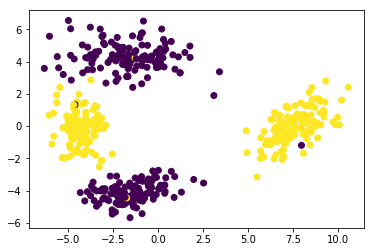

In [39]:
X_new_transform = pca.transform(X_new)
plt.scatter(X_new_transform[:,0], X_new_transform[:,1], c=y)

**Puede que los datos tengan una estructura más rica. Mediante el método elbow (Acuérdate de que el atributo *inertia_* nos daba la información que necesitamos saber y plotear una vez fitteado el kmeans), estima el número óptimo de clusters.**

Text(0,0.5,'Average intra-group cluster')

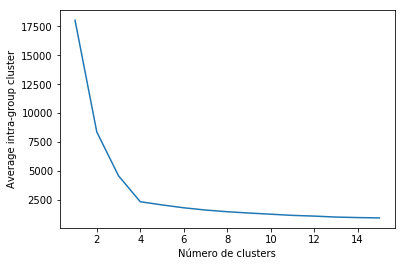

In [41]:
clusters = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

kmeans_intra_distance = []

for clus in clusters:
    km = KMeans(n_clusters=clus, random_state=0)
    km.fit(X_new)
    
    intra_distance_total = km.inertia_
    
    kmeans_intra_distance.append(intra_distance_total)
    

plt.plot(clusters, kmeans_intra_distance)
plt.xlabel("Número de clusters")
plt.ylabel("Average intra-group cluster")

**Haz un scatter plot de los datos en estas dos nuevas dimensiones, pasándole como argumento "c" el valor de predicciones para KMeans con el número óptimo de clusters estimado anteriormente**

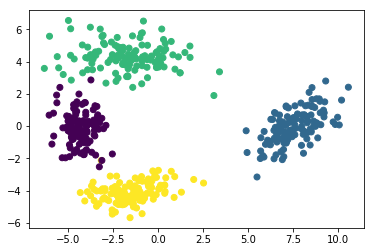

In [44]:
#Refiteamos el KMeans con el número óptimo, que es 4. 
km = KMeans(n_clusters=4, random_state=0)
km.fit(X_new)
#Y le pasamos los labels de cluster de las observaciones que da el KMeans

plt.scatter(X_new_transform[:,0], X_new_transform[:,1], c=km.labels_)